In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd 
import torch 
import numpy as np 
import seaborn as sns 
from torch import nn 
import time 
import random 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,precision_score,recall_score,f1_score
from matplotlib import pyplot as plt 
import pickle 

In [6]:
!cp /content/drive/MyDrive/Viettel3/train_n.csv /content/
!cp /content/drive/MyDrive/Viettel3/test_n.csv /content/

In [7]:
train=pd.read_csv('train_n.csv')
test=pd.read_csv('test_n.csv')

In [8]:
train

,file_name,text,label
0,VH_VNE_ (2441).txt,Khoả_thân cảnh_tỉnh bệnh AIDS Ca_sĩ Dannii_Min...,0
1,VH_NLD_ (4206).txt,Triển_lãm áo_dài đất Mỹ_Nữ_sinh Châu_Đốc áo_dà...,0
2,VH_NLD_ (3718).txt,Harrison_Ford đàn_ông đa_tình Vào_vai Jack Sta...,0
3,VH_TT_ (3159).txt,Tiếng hát sông Hàn tình_ca gia_đình Sinh đất_n...,0
4,VH_TN_ (3567).txt,Triển_lãm tranh họa Mark_Jones diễn gallery Tự...,0
...,...,...,...
33754,DS_TN_ (4630).txt,cô_đơn chẳng trống_rỗng rơi tham_khảo khuyên g...,9
33755,DS_ VNE_ (3077).txt,Quang bình_tĩnh nóng_vội một_chiều sống cuộc_đ...,9
33756,DS_TN_ (4913).txt,tuấn_mã châu đạp chân trường_đua Phú_Thọ thay ...,9
33757,DS_ VNE_ (1028).txt,Bánh_cuốn làng Kênh Bánh_cuốn làng Kênh Nam_Đị...,9


In [9]:
labels={
0:"Van hoa",
1:"Chinh tri Xa hoi",
2:"Khoa hoc",
3:"Phap luat",
4:"Vi tinh",
5:"Suc khoe",
6:"Kinh doanh",
7:"The thao",
8:"The gioi",
9:"Doi song"
}

In [10]:
print(len(train))

33759


In [11]:
print(len(train[train.label==9]))

3159


In [12]:
temp=train[train.label==9]
temp=temp.sample(len(temp))
train=pd.concat((train,temp),axis=0)

In [13]:
temp=train[train.label==2]
temp=temp.sample(int(len(temp)*6/7))
train=pd.concat((train,temp),axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


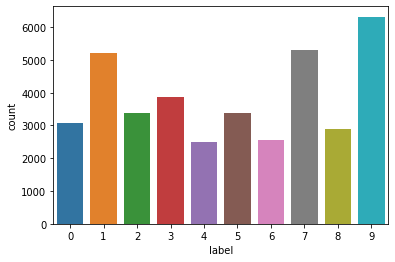

In [14]:
sns.countplot(train.label)

In [15]:
random.seed(42)
val=train[train.label==0].sample(int(len(train[train.label==0])*0.2))
for i in range(1,10,1):
  temp=train[train.label==i]
  temp1=temp.sample(int(len(temp)*0.2))
  val=pd.concat([val,temp1],axis=0)

In [16]:
data_train=train[~train.index.isin(val.index)]
data_val=val
data_train=data_train.sample(frac=1)
data_val=data_val.sample(frac=1)

In [17]:
print(data_train.shape)
print(data_val.shape)

(29252, 3)
(7691, 3)


In [18]:
y_train=data_train.label.values
y_val=data_val.label.values
y_test=test.label.values

# Naive Bayes

In [19]:
model=Pipeline([
                ('vect',CountVectorizer(ngram_range=(1,1),max_features=None)),
                #('tfidf',TfidfTransformer()),
                ('clf',MultinomialNB())
])
model.fit(data_train.text.values.tolist(),y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
y_pred_val_bayes=model.predict(data_val.text.values.tolist())
accuracy_score_validation_bayes=accuracy_score(y_pred_val_bayes,y_val)
print(accuracy_score_validation_bayes)

0.889481211806007


In [21]:
print(classification_report(y_val,y_pred_val_bayes,target_names=list(labels.values())))

                  precision    recall  f1-score   support

         Van hoa       0.91      0.93      0.92       616
Chinh tri Xa hoi       0.77      0.83      0.80      1043
        Khoa hoc       0.90      0.77      0.83       676
       Phap luat       0.91      0.90      0.91       773
         Vi tinh       0.93      0.90      0.91       496
        Suc khoe       0.89      0.93      0.91       676
      Kinh doanh       0.84      0.86      0.85       510
        The thao       0.99      0.95      0.97      1059
        The gioi       0.92      0.89      0.90       579
        Doi song       0.88      0.91      0.90      1263

        accuracy                           0.89      7691
       macro avg       0.89      0.89      0.89      7691
    weighted avg       0.89      0.89      0.89      7691



Text(0.5, 1.0, 'Accuracy for test:0.88948')

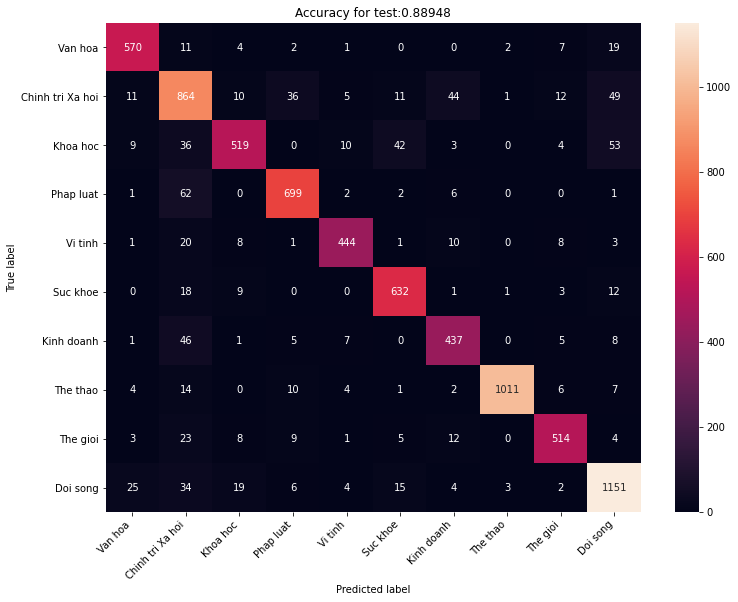

In [22]:
temp=confusion_matrix(y_val,y_pred_val_bayes)
df=pd.DataFrame(temp,index=labels.values(),columns=labels.values()).astype(int)
plt.figure(figsize=(12,9))
heatmap=sns.heatmap(df,annot=True,fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Accuracy for test:{:0.5f}".format(accuracy_score_validation_bayes))
# plt.savefig('/content/drive/MyDrive/Viettel1/naive_bayes_val.png')

In [23]:
y_pred_test_bayes=model.predict(test.text.values.tolist())
accuracy_score_test_bayes=accuracy_score(y_test,y_pred_test_bayes)
print(accuracy_score_test_bayes)

0.9000853631905982


In [24]:
print(precision_score(y_test,y_pred_test_bayes,average='weighted'))
print(recall_score(y_test,y_pred_test_bayes,average='weighted'))
print(f1_score(y_test,y_pred_test_bayes,average='weighted'))

0.9034347597670157
0.9000853631905982
0.9010367517288557


In [25]:
print(classification_report(y_test,y_pred_test_bayes,target_names=list(labels.values())))

                  precision    recall  f1-score   support

         Van hoa       0.93      0.93      0.93      6250
Chinh tri Xa hoi       0.82      0.88      0.85      7567
        Khoa hoc       0.84      0.73      0.78      2096
       Phap luat       0.88      0.90      0.89      3788
         Vi tinh       0.94      0.92      0.93      4560
        Suc khoe       0.93      0.93      0.93      5417
      Kinh doanh       0.91      0.87      0.89      5276
        The thao       0.99      0.96      0.97      6667
        The gioi       0.94      0.90      0.92      6716
        Doi song       0.67      0.81      0.73      2036

        accuracy                           0.90     50373
       macro avg       0.88      0.88      0.88     50373
    weighted avg       0.90      0.90      0.90     50373



Text(0.5, 1.0, 'Accuracy for test:0.90009')

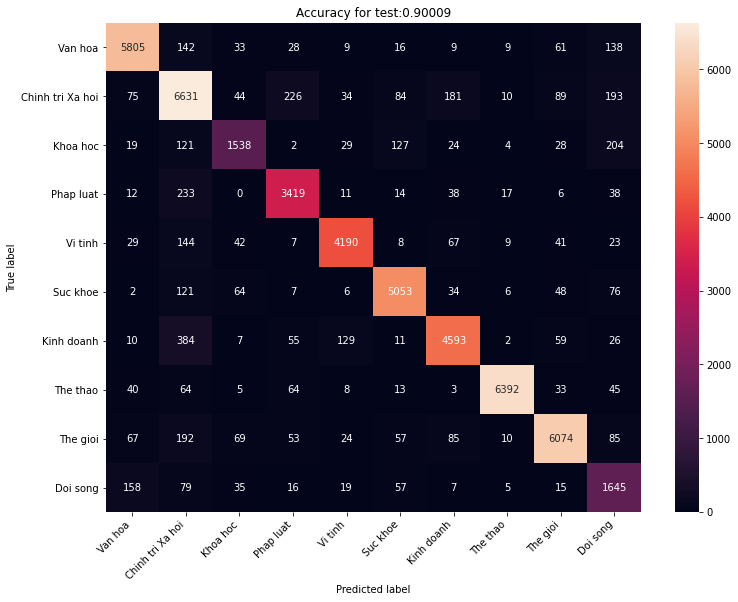

In [26]:
temp=confusion_matrix(y_test,y_pred_test_bayes)
df=pd.DataFrame(temp,index=labels.values(),columns=labels.values()).astype(int)
plt.figure(figsize=(12,9))
heatmap=sns.heatmap(df,annot=True,fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Accuracy for test:{:0.5f}".format(accuracy_score_test_bayes))
# plt.savefig('/content/drive/MyDrive/Viettel1/naive_bayes_test.png')

In [27]:
import numpy as np
with open('navie.npy','wb') as file:
  np.save(file,np.asarray(y_pred_test_bayes))

In [28]:
with open('true.npy','wb') as file:
  np.save(file,np.asarray(y_test))

In [ ]:
indexs=[]
for idx,value in enumerate(y_pred_test_bayes):
  if value==1 and y_test[idx]!=1:
    indexs.append(idx)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


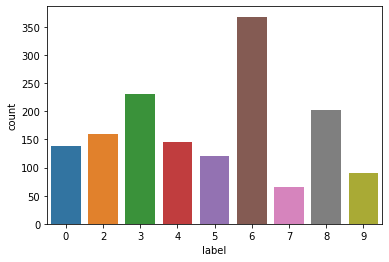

In [ ]:
temp=test[test.index.isin(indexs)]
sns.countplot(temp.label)

In [ ]:
print(temp[temp.label==8].file_name.tolist())

['TG_NLD_T_ (7832).txt', 'TG_NLD_T_ (8046).txt', 'TG_VNE_T_ (4093).txt', 'TG_VNE_T_ (2290).txt', 'TG_VNE_T_ (7535).txt', 'TG_VNE_T_ (7538).txt', 'TG_VNE_T_ (7233).txt', 'TG_VNE_T_ (7072).txt', 'TG_VNE_T_ (1879).txt', 'TG_VNE_T_ (5533).txt', 'TG_VNE_T_ (1928).txt', 'TG_VNE_T_ (5637).txt', 'TG_VNE_T_ (7529).txt', 'TG_VNE_T_ (1663).txt', 'TG_VNE_T_ (3938).txt', 'TG_VNE_T_ (7083).txt', 'TG_TT_T_ (7617).txt', 'TG_VNE_T_ (2679).txt', 'TG_VNE_T_ (5988).txt', 'TG_VNE_T_ (3549).txt', 'TG_NLD_T_ (8066).txt', 'TG_VNE_T_ (3317).txt', 'TG_VNE_T_ (1305).txt', 'TG_VNE_T_ (7006).txt', 'TG_VNE_T_ (5860).txt', 'TG_VNE_T_ (4441).txt', 'TG_VNE_T_ (2956).txt', 'TG_NLD_T_ (7882).txt', 'TG_NLD_T_ (7897).txt', 'TG_VNE_T_ (6472).txt', 'TG_VNE_T_ (3616).txt', 'TG_VNE_T_ (1184).txt', 'TG_VNE_T_ (848).txt', 'TG_VNE_T_ (6881).txt', 'TG_VNE_T_ (4078).txt', 'TG_TT_T_ (7533).txt', 'TG_VNE_T_ (7375).txt', 'TG_VNE_T_ (4861).txt', 'TG_VNE_T_ (2778).txt', 'TG_VNE_T_ (2005).txt', 'TG_VNE_T_ (6994).txt', 'TG_TN_T_ (7655).t

# Test naive

In [ ]:
!pip install pyvi
!pip install underthesea

In [ ]:
from processing import process_data

In [ ]:
def test_model(model_class,file_name):
  file=open(file_name,'r',encoding='utf-8')
  text=file.read()
  text=process_data(text)
  result=model.predict([text])
  print(labels.get(result[0]))

In [ ]:
test_model(model,'a.txt')

The thao


In [ ]:
with open('/content/drive/MyDrive/Viettel1/naive_bayes.pickle','wb') as file:
  pickle.dump(model,file,protocol=pickle.HIGHEST_PROTOCOL)

# KNN

In [ ]:
model_knn=Pipeline([
                    ('vect',CountVectorizer(ngram_range=(1,1),max_features=None)),
                    ('svd',TruncatedSVD(n_components=300,random_state=42)),
                    ('clf',KNeighborsClassifier(n_neighbors=11))
])
model_knn.fit(data_train.text.values.tolist(),y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=300,
                              n_iter=5, random_state=42, tol=0.0)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

In [ ]:
y_pred_val_knn=model_knn.predict(data_val.text.values.tolist())
accuracy_score_val_knn=accuracy_score(y_val,y_pred_val_knn)
print(accuracy_score_val_knn)

0.7911845013652321


In [ ]:
y_pred_test_knn=model_knn.predict(test.text.values.tolist())
accuracy_score_test_knn=accuracy_score(y_test,y_pred_test_knn)
print(accuracy_score_test_knn)

0.8035852540051218


In [ ]:
print(precision_score(y_test,y_pred_test_knn,average='weighted'))
print(recall_score(y_test,y_pred_test_knn,average='weighted'))
print(f1_score(y_test,y_pred_test_knn,average='weighted'))

0.8156472893193779
0.7982649435213308
0.7995038120474819


In [ ]:
print(classification_report(y_val,y_pred_val_knn,target_names=list(labels.values())))

                  precision    recall  f1-score   support

         Van hoa       0.85      0.85      0.85       616
Chinh tri Xa hoi       0.65      0.81      0.72      1043
        Khoa hoc       0.91      0.47      0.62       364
       Phap luat       0.83      0.82      0.83       773
         Vi tinh       0.80      0.85      0.82       496
        Suc khoe       0.81      0.86      0.83       676
      Kinh doanh       0.84      0.66      0.74       510
        The thao       0.96      0.93      0.94      1059
        The gioi       0.89      0.69      0.78       579
        Doi song       0.67      0.80      0.73       631

        accuracy                           0.80      6747
       macro avg       0.82      0.77      0.79      6747
    weighted avg       0.81      0.80      0.80      6747



In [ ]:
print(classification_report(y_test,y_pred_test_knn,target_names=list(labels.values())))

                  precision    recall  f1-score   support

         Van hoa       0.86      0.83      0.85      6250
Chinh tri Xa hoi       0.66      0.83      0.73      7567
        Khoa hoc       0.80      0.41      0.54      2096
       Phap luat       0.74      0.81      0.77      3788
         Vi tinh       0.82      0.88      0.85      4560
        Suc khoe       0.83      0.89      0.86      5417
      Kinh doanh       0.87      0.68      0.76      5276
        The thao       0.97      0.94      0.95      6667
        The gioi       0.93      0.75      0.83      6716
        Doi song       0.39      0.55      0.46      2036

        accuracy                           0.80     50373
       macro avg       0.79      0.76      0.76     50373
    weighted avg       0.82      0.80      0.80     50373



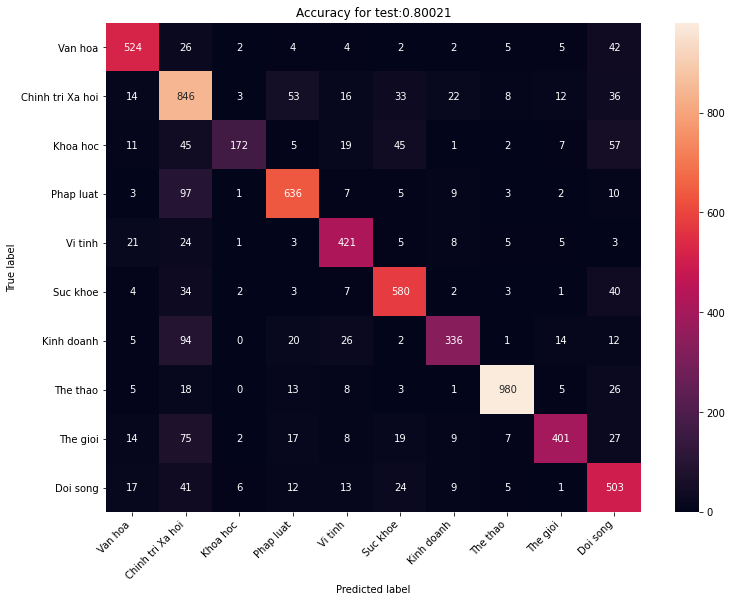

In [ ]:
temp=confusion_matrix(y_val,y_pred_val_knn)
df=pd.DataFrame(temp,index=labels.values(),columns=labels.values()).astype(int)
plt.figure(figsize=(12,9))
heatmap=sns.heatmap(df,annot=True,fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Accuracy for test:{:0.5f}".format(accuracy_score_val_knn))
plt.savefig('/content/drive/MyDrive/Viettel1/knn_val.png')

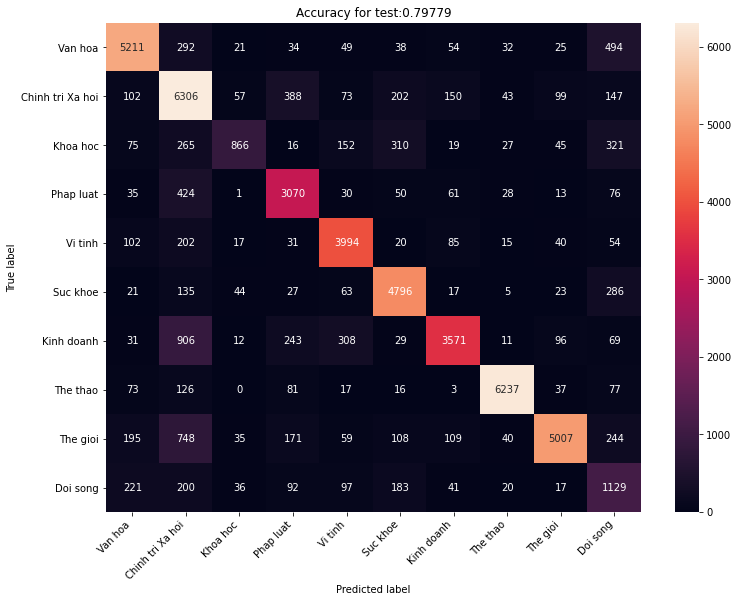

In [ ]:
temp=confusion_matrix(y_test,y_pred_test_knn)
df=pd.DataFrame(temp,index=labels.values(),columns=labels.values()).astype(int)
plt.figure(figsize=(12,9))
heatmap=sns.heatmap(df,annot=True,fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Accuracy for test:{:0.5f}".format(accuracy_score_test_knn))
plt.savefig('/content/drive/MyDrive/Viettel1/knn_test.png')

In [ ]:
with open('/content/drive/MyDrive/Viettel1/knn_model.pickle','wb') as file:
  pickle.dump(model_knn,file,protocol=pickle.HIGHEST_PROTOCOL)